In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
data = fetch_california_housing()

In [5]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
df = pd.DataFrame(data['data'], columns = data['feature_names'])

In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
df['MedHouseVal'] = data.target

In [9]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [12]:
df_copy = df.copy()

In [13]:
q1 = df_copy.quantile(0.25)
q3 = df_copy.quantile(0.75)
iqr = q3 - q1

In [14]:
iqr

MedInc           2.179850
HouseAge        19.000000
AveRooms         1.611665
AveBedrms        0.093447
Population     938.000000
AveOccup         0.852520
Latitude         3.780000
Longitude        3.790000
MedHouseVal      1.451250
dtype: float64

In [15]:
df_final = df_copy[~((df_copy < q1 - 1.5 * iqr) | (df_copy > q3 + 1.5 * iqr))]

In [16]:
df = df_final.copy()

In [17]:
df.shape

(20640, 9)

In [18]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,NaN,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,NaN,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [19]:
df.dropna(inplace = True)

In [20]:
df.shape

(16312, 9)

In [21]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

<Axes: >

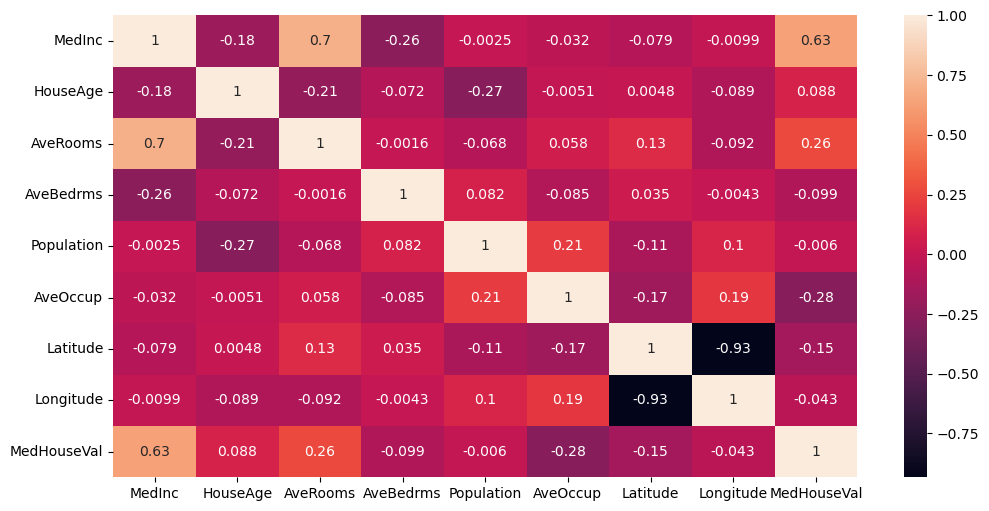

In [22]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), annot = True)

## Scaling the data

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
x = scaler.fit_transform(df.drop(['MedHouseVal'], axis = 1))
y = df['MedHouseVal']

In [26]:
x

array([[ 2.49167739,  1.84948973,  3.00139887, ..., -0.10065879,
         1.01798504, -1.30975579],
       [ 1.37420318,  1.84948973,  0.63374145, ..., -0.50761967,
         1.01798504, -1.31476812],
       [ 0.13032695,  1.84948973,  1.07885558, ..., -1.09406721,
         1.01798504, -1.31476812],
       ...,
       [-1.3553468 , -1.02075311,  0.0474685 , ..., -0.863366  ,
         1.75611141, -0.7984986 ],
       [-1.23960519, -0.93874617,  0.16626435, ..., -1.18729318,
         1.75611141, -0.84862185],
       [-0.8786741 , -1.10276005,  0.0945903 , ..., -0.39714661,
         1.7280813 , -0.80852325]])

In [27]:
y

2        3.521
3        3.413
4        3.422
5        2.697
6        2.992
         ...  
20634    1.168
20635    0.781
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 16312, dtype: float64

## Spliting the Data

In [28]:
from sklearn.model_selection import train_test_split
x_train, xtest, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [29]:
x_train.shape

(11418, 8)

## Decision Tree Regressor

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
reg = DecisionTreeRegressor()

In [32]:
reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [33]:
predict = reg.predict(xtest)

In [34]:
predict

array([2.286, 3.812, 1.218, ..., 1.034, 3.356, 1.531])

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
mean_squared_error(y_test, predict)

0.3797563486882305

<Axes: ylabel='MedHouseVal'>

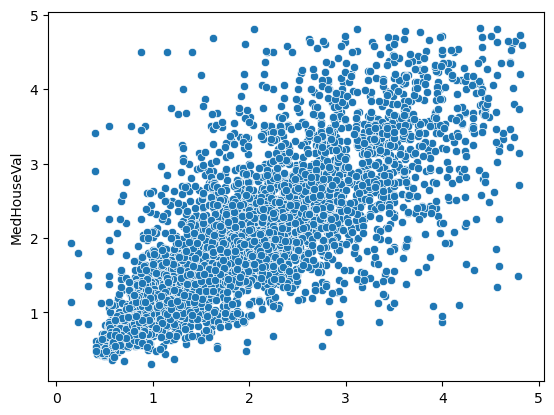

In [37]:
sns.scatterplot(x = predict, y = y_test)

## Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
reg_rf = RandomForestRegressor(500)

In [45]:
reg_rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=500)

In [46]:
predict = reg_rf.predict(xtest)

In [47]:
mean_squared_error(y_test, predict)

0.1883267201275497

<Axes: ylabel='MedHouseVal'>

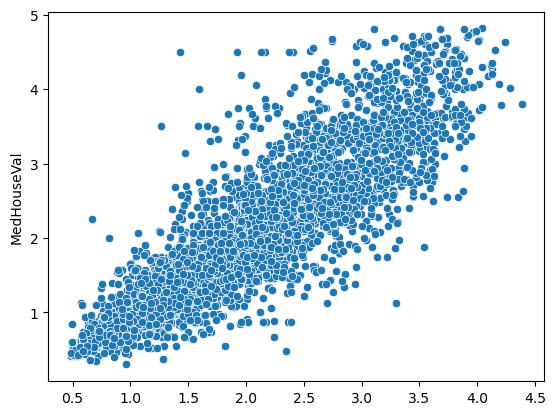

In [48]:
sns.scatterplot(x = predict, y = y_test)